In [33]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [34]:
import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image


In [35]:
# Root directory containing the images
root_dir = "D:\\CottonFabricImageBD\\Original"

In [36]:
# File paths and labels
file_paths = []
labels = []

In [37]:
# Iterate through the dataset
for class_name in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            file_paths.append(os.path.join(class_dir, image_name))
            labels.append(class_name)


In [38]:
# Create a dataframe and shuffle it
df = pd.DataFrame({'file_path': file_paths, 'label': labels})
df = df.sample(frac=1).reset_index(drop=True)


In [39]:
# Display class distribution
class_counts_df = df['label'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '40cotton'),
  Text(1, 0, '30cotton'),
  Text(2, 0, '63cotton'),
  Text(3, 0, '98cotton'),
  Text(4, 0, '53cotton'),
  Text(5, 0, '99cotton'),
  Text(6, 0, '65cotton'),
  Text(7, 0, '80cotton'),
  Text(8, 0, '66cotton'),
  Text(9, 0, '58cotton'),
  Text(10, 0, '50cotton'),
  Text(11, 0, '95cotton'),
  Text(12, 0, '60cotton')])

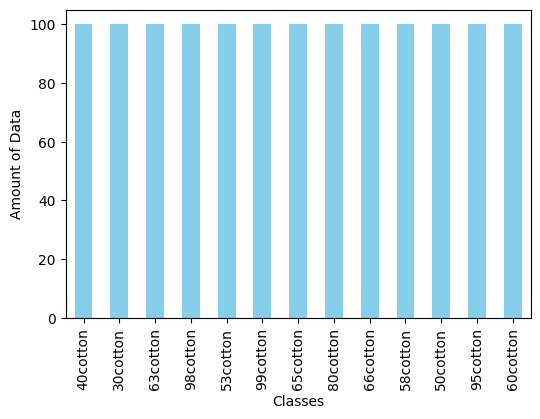

In [40]:
# Plot class distribution
plt.figure(figsize=(6, 4))
ax = class_counts_df.plot(kind='bar', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Amount of Data')
plt.xticks(rotation=90)

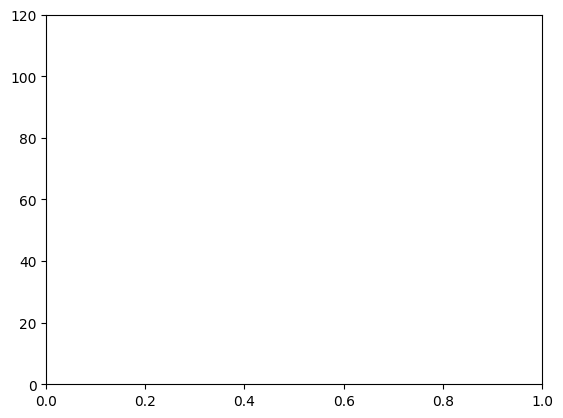

In [41]:
for i, count in enumerate(class_counts_df):
    ax.text(i, count + 5, str(count), ha='center')
plt.ylim(0, max(class_counts_df) * 1.2)
plt.show()

In [42]:
# Image resizing function
dataset = "D:\\CottonFabricImageBD\\Original"
new_dataset = "D:\\CottonFabricImageBD\\resized"
os.makedirs(new_dataset, exist_ok=True)

In [43]:
new_size = (224, 224)

def get_size_in_mb(file_path):
    size_in_bytes = os.path.getsize(file_path)
    return size_in_bytes / (1024 * 1024)

# Image resizing and saving to a new folder
for class_folder in os.listdir(dataset):
    class_path = os.path.join(dataset, class_folder)

    if os.path.isdir(class_path):
        new_class_path = os.path.join(new_dataset, class_folder)
        os.makedirs(new_class_path, exist_ok=True)

        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(class_path, filename)

                img = Image.open(img_path)

                original_size = get_size_in_mb(img_path)
                original_dimensions = img.size

                # Resize the image
                img_resized = img.resize(new_size)

                # Save the resized image
                save_path = os.path.join(new_class_path, filename)
                img_resized.save(save_path)

                resized_size = get_size_in_mb(save_path)
                resized_dimensions = img_resized.size

                # Print out the details for each image
                print(f"Image: {filename}")
                print(f"Original Dimensions: {original_dimensions}, Size: {original_size:.2f} MB")
                print(f"Resized Dimensions: {resized_dimensions}, Size: {resized_size:.2f} MB")
                print("-" * 50)

Image: original_1001.jpg
Original Dimensions: (900, 1200), Size: 0.22 MB
Resized Dimensions: (224, 224), Size: 0.01 MB
--------------------------------------------------
Image: original_1002.jpg
Original Dimensions: (900, 1200), Size: 0.33 MB
Resized Dimensions: (224, 224), Size: 0.02 MB
--------------------------------------------------
Image: original_1003.jpg
Original Dimensions: (900, 1200), Size: 0.27 MB
Resized Dimensions: (224, 224), Size: 0.02 MB
--------------------------------------------------
Image: original_1004.jpg
Original Dimensions: (900, 1200), Size: 0.28 MB
Resized Dimensions: (224, 224), Size: 0.02 MB
--------------------------------------------------
Image: original_1005.jpg
Original Dimensions: (900, 1200), Size: 0.29 MB
Resized Dimensions: (224, 224), Size: 0.01 MB
--------------------------------------------------
Image: original_1006.jpg
Original Dimensions: (900, 1200), Size: 0.28 MB
Resized Dimensions: (224, 224), Size: 0.02 MB
-------------------------------

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '40cotton'),
  Text(1, 0, '30cotton'),
  Text(2, 0, '63cotton'),
  Text(3, 0, '98cotton'),
  Text(4, 0, '53cotton'),
  Text(5, 0, '99cotton'),
  Text(6, 0, '65cotton'),
  Text(7, 0, '80cotton'),
  Text(8, 0, '66cotton'),
  Text(9, 0, '58cotton'),
  Text(10, 0, '50cotton'),
  Text(11, 0, '95cotton'),
  Text(12, 0, '60cotton')])

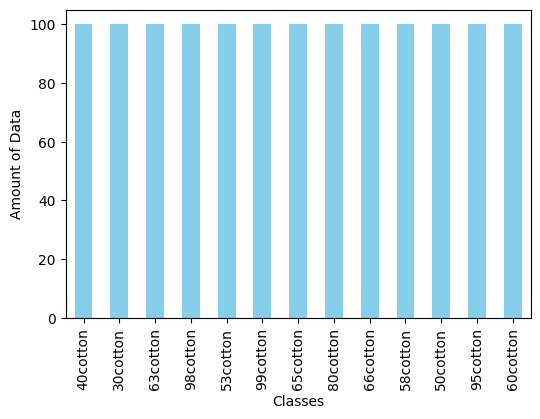

In [44]:
# Plot class distribution
plt.figure(figsize=(6, 4))
ax = class_counts_df.plot(kind='bar', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Amount of Data')
plt.xticks(rotation=90)